In [1]:
import cv2
from joblib import load
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from IPython.display import display, Image
import pandas as pd

In [2]:
# Load model yang sudah dilatih
model_path = 'best_knn_model.h5'
knn_model = load(model_path)

In [3]:
def extract_glcms_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray_image, distances=[1], angles=[135], levels=256, symmetric=True, normed=True)
    properties = ['contrast', 'homogeneity', 'energy', 'correlation']
    glcm_features = [graycoprops(glcm, prop).ravel()[0] for prop in properties]
    return glcm_features

In [4]:
def extract_hsv_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    hsv_features = [np.mean(h), np.mean(s), np.mean(v)]
    return hsv_features

In [5]:
def classify_image(image_path):
    # Membaca gambar
    image = cv2.imread(image_path)
    
    # Menampilkan gambar di notebook
    image_to_display = Image(filename=image_path)
    display(image_to_display)
    
    # Ekstraksi fitur dari gambar
    glcm_features = extract_glcms_features(image)
    hsv_features = extract_hsv_features(image)
    features = glcm_features + hsv_features
    
    X = []
    X.append(features)
    # Buat DataFrame dari fitur dan label
    data = {'Fitur': X}
    df = pd.DataFrame(data)
    
    #Pisahkan fitur GLCM dan HSV
    df['GLCM_Contrast'] = [feat[0] for feat in df['Fitur']]
    df['GLCM_Homogeneity'] = [feat[1] for feat in df['Fitur']]
    df['GLCM_Energy'] = [feat[2] for feat in df['Fitur']]
    df['GLCM_Correlation'] = [feat[3] for feat in df['Fitur']]
    df['HSV_H_Mean'] = [feat[4] for feat in df['Fitur']]
    df['HSV_S_Mean'] = [feat[5] for feat in df['Fitur']]
    df['HSV_V_Mean'] = [feat[6] for feat in df['Fitur']]
    
    # Simpan DataFrame ke file CSV
    df.to_csv('ekstraksi_fitur_testing.csv', index=False)
    
    # Melakukan prediksi pada gambar
    prediction = knn_model.predict([features])
    
    print(prediction[0])
    # Mengembalikan hasil prediksi
    if prediction[0] == 'aeromonas':
        return 'Gambar terindikasi sebagai penyakit Aeromonas'
    elif prediction[0] == 'penyakit_lain':
        return 'Gambar terindikasi sebagai penyakit lain'
    else:
        return 'Gambar terindikasi sebagai ikan yang sehat'

### Contoh penggunaan

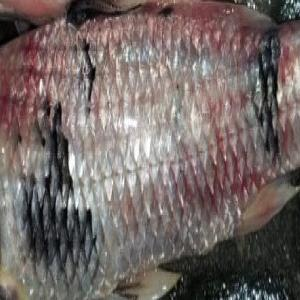

sehat
Gambar terindikasi sebagai ikan yang sehat


In [9]:
test_image_path = 'LibraryDataset/Testing/aeromonas2.jpg'
result = classify_image(test_image_path)
print(result)